In [1]:
# pip install ucimlrepo
# !pip install imbalanced-learn



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

### The data are already divided into features and target. Look at data

In [4]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [5]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [6]:
print(X.shape)  # Shape of the features DataFrame
print(y.shape)  # Shape of the targets DataFrame (if applicable)


(48842, 14)
(48842, 1)


In [7]:
print(X.info())  # Information about the features DataFrame
print(y.info())  # Information about the targets DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Co

In [8]:
print(X.describe())  # Descriptive statistics for the features DataFrame
print(y.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
       income
count   48842
unique      4
top     <=50K
freq   

### Look at all the unique values in dataset

In [9]:
for column in X.columns:
    unique_values = X[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")


Unique values for age:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

Unique values for workclass:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

Unique values for fnlwgt:
[ 77516  83311 215646 ... 173449  89686 350977]

Unique values for education:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Unique values for education-num:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for marital-status:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique values for occupation:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' '

In [10]:
unique_values = y['income'].unique()
print(f"Unique values for {column}:\n{unique_values}\n")

Unique values for native-country:
['<=50K' '>50K' '<=50K.' '>50K.']



In [11]:
# Replace values in the 'income' column
y['income'] = y['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

C:\Users\Acer\AppData\Local\Temp\ipykernel_10044\3161693252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})


In [12]:
unique_values = y['income'].unique()
print(f"Unique values for {column}:\n{unique_values}\n")


Unique values for native-country:
['<=50K' '>50K']



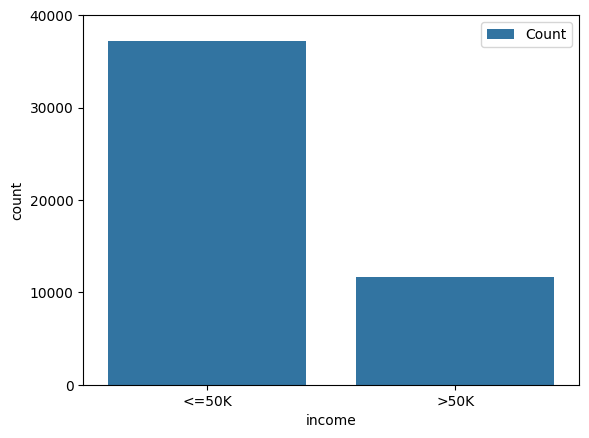

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of >50K & <=50K
sns.countplot(x='income',data=y, label="Count")
plt.yticks(range(0, 50000, 10000))
plt.show()


In [14]:
# Count the number of samples for each class in the income column
income_counts = y['income'].value_counts()
print("Class Distribution:\n", income_counts)


Class Distribution:
 income
<=50K    37155
>50K     11687
Name: count, dtype: int64


### Can see some null values and some values with '?' . Change all '?' to null

In [15]:
# Check for '?' in the DataFrame
question_mark_count = (X == '?').sum()

# Check for NaN values in the DataFrame
nan_count = X.isnull().sum()

print(f"Count of '?' values:\n{question_mark_count}\n")
print(f"Count of NaN values:\n{nan_count}\n")


Count of '?' values:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64

Count of NaN values:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64



In [16]:
# Replace '?' with NaN
X.replace('?', pd.NA, inplace=True)


C:\Users\Acer\AppData\Local\Temp\ipykernel_10044\418228730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('?', pd.NA, inplace=True)


In [17]:
# Check for NaN values in the DataFrame
nan_count = X.isnull().sum()
print(nan_count)

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64


In [18]:
# Fill NaN values in 'workclass' column with 'unknown'
X['workclass'].fillna('unknown', inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_10044\1110384011.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['workclass'].fillna('unknown', inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_10044\1110384011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workclass'].fillna('unknown', inplace=True)


In [19]:
X['workclass'].value_counts()


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
unknown              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [20]:
# Fill NaN values in 'occupation' column with 'unknown'
X['occupation'].fillna('unknown', inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_10044\1217559194.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['occupation'].fillna('unknown', inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_10044\1217559194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occupation'].fillna('unknown', inplace=True)


In [21]:
X['occupation'].value_counts()


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
unknown              2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [22]:
# Fill NaN values in 'native-country' column with 'unknown'
X['native-country'].fillna('unknown', inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_10044\3042044066.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['native-country'].fillna('unknown', inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_10044\3042044066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['native-country'].fillna('unknown', inplace=True)


In [23]:
X['native-country'].value_counts()


native-country
United-States                 43832
Mexico                          951
unknown                         857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

### merge data for plotting and outlier handling

In [24]:
# Merge X and y into a single DataFrame
merged_data = pd.concat([X, y], axis=1)

In [25]:
# Display the merged DataFrame
print(merged_data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [26]:
for column in merged_data.columns:
    unique_values = merged_data[column].unique()
    print(f"Unique values for {column}:\n{unique_values}\n")


Unique values for age:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

Unique values for workclass:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'unknown' 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique values for fnlwgt:
[ 77516  83311 215646 ... 173449  89686 350977]

Unique values for education:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Unique values for education-num:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for marital-status:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique values for occupation:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners'

## Handle outlier

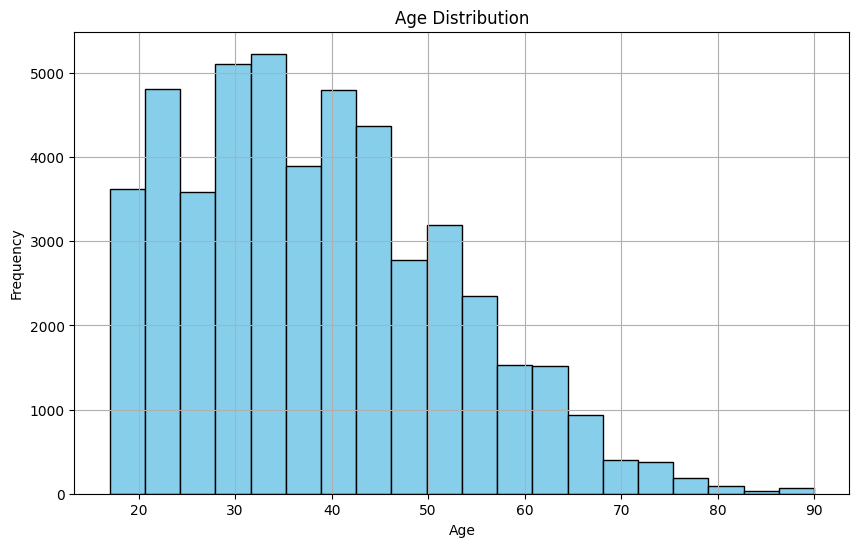

In [27]:
# Plot Age histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

### age is skwed so get avg

In [28]:
merged_data.loc[merged_data['age'] >=80]['age'].value_counts()


age
90    55
80    38
81    37
82    15
84    13
83    11
88     6
85     5
87     3
89     2
86     1
Name: count, dtype: int64

### from 82 count lower so get avg from there

In [29]:
# Calculate the average age for the range 82-86
age_avg = merged_data[(merged_data['age'] >= 82) & (merged_data['age'] <= 90)]['age'].mean()

# Round the average age
age_avg = round(age_avg)

# Fill ages between 82 and 86, inclusive, with the average age
merged_data.loc[(merged_data['age'] >= 82) & (merged_data['age'] <= 90), 'age'] = age_avg


In [30]:
merged_data.loc[merged_data['age'] >=80]['age'].value_counts()


age
87    111
80     38
81     37
Name: count, dtype: int64

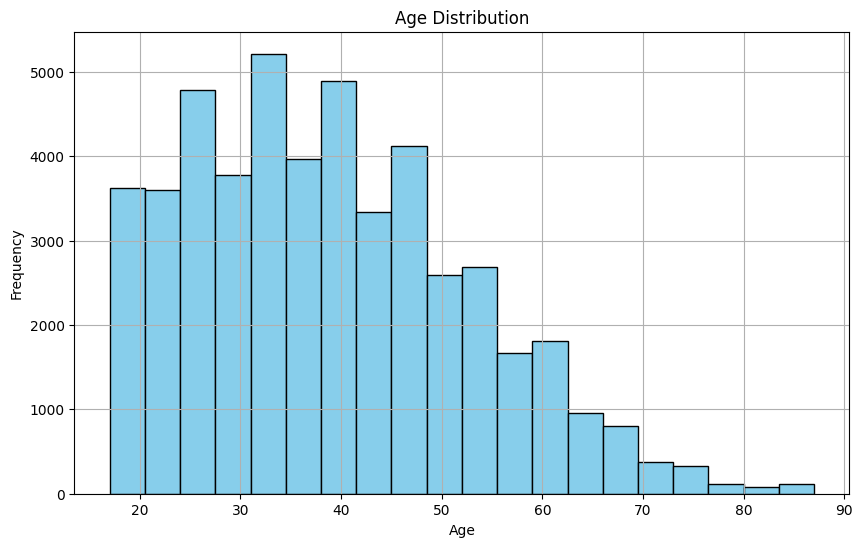

In [31]:
# Plot Age histogram
plt.figure(figsize=(10, 6))
plt.hist(merged_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

### plot boxplot before and after outlier handling

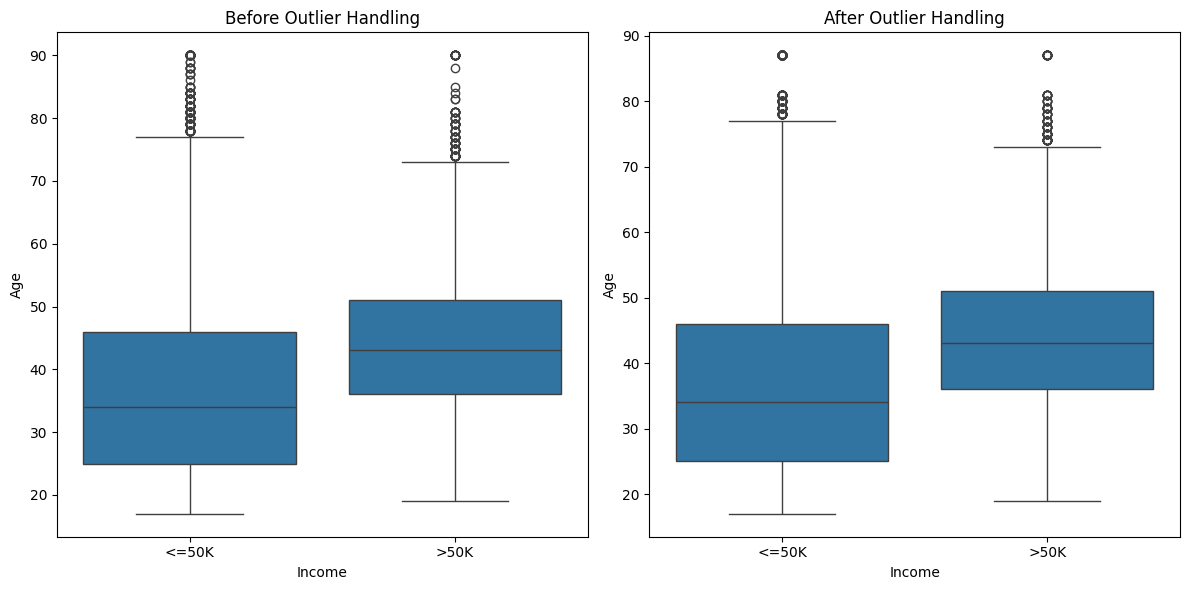

In [32]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Age vs Income using a box plot before handling outliers
sns.boxplot(x=y.columns[0], y=X.columns[0], data=pd.concat([X, y], axis=1), ax=axes[0])
axes[0].set_title('Before Outlier Handling')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Age')

# Plot Age vs Income using a box plot after handling outliers
sns.boxplot(x=y.columns[0], y='age', data=merged_data, ax=axes[1])
axes[1].set_title('After Outlier Handling')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.show()


## sort according to age for easiness

In [33]:
# Sort merged_data in ascending order based on 'age'
merged_data_sorted = merged_data.sort_values(by='age', ascending=True)

# Display the sorted DataFrame
print(merged_data_sorted.head())


       age workclass  fnlwgt education  education-num marital-status  \
28092   17   Private   36877      10th              6  Never-married   
46962   17   Private   73820      12th              8  Never-married   
42922   17   Private  165457      10th              6  Never-married   
1389    17   Private   46496      11th              7  Never-married   
32963   17   Private   40299      11th              7  Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
28092          Sales    Own-child  White  Female             0             0   
46962          Sales    Own-child  White  Female             0             0   
42922  Other-service    Own-child  White    Male             0             0   
1389   Other-service    Own-child  White    Male             0             0   
32963          Sales    Own-child  White  Female             0             0   

       hours-per-week native-country income  
28092              10  United-States  <=

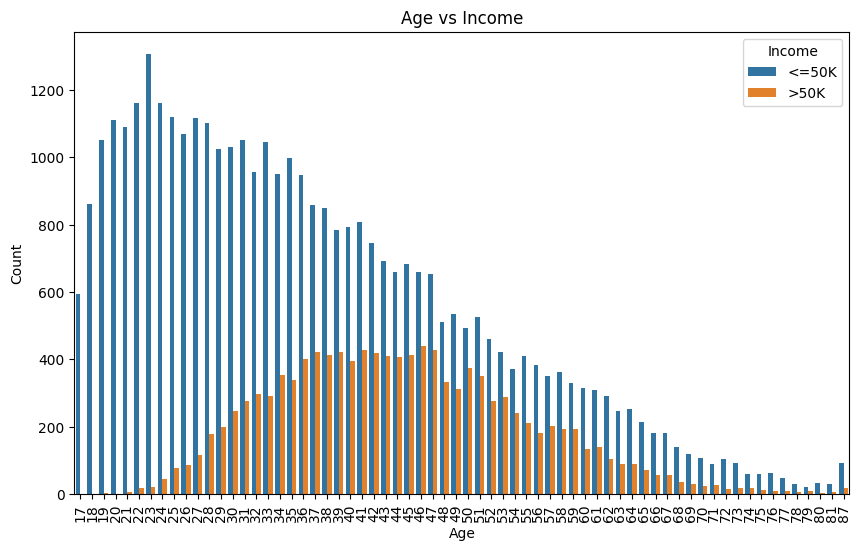

In [34]:
# Plot workclass vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='income', data=merged_data_sorted)
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Income')
plt.show()


## Feature Engineering

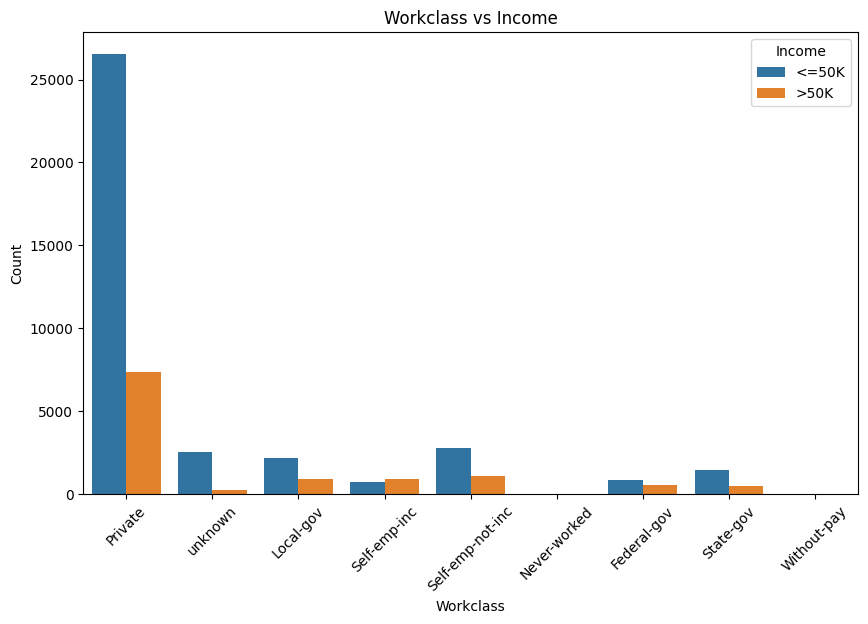

In [35]:
# Plot workclass vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', hue='income', data=merged_data_sorted)
plt.title('Workclass vs Income')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


### combine categories

In [40]:
# Combine categories in the 'workclass' attribute
merged_data_sorted['workclass'] = merged_data_sorted['workclass'].replace({
    'Self-emp-not-inc': 'Self-employed',
    'Self-emp-inc': 'Self-employed',
    'Federal-gov': 'Government',
    'Local-gov': 'Government',
    'State-gov': 'Government',
    'Without-pay': 'No-Work',
    'Never-worked': 'No-Work'
})

# Check the unique values after combining categories
print(merged_data_sorted['workclass'].unique())


['Private' 'unknown' 'Government' 'Self-employed' 'No-Work']


In [41]:
merged_data_sorted['workclass'].value_counts()


workclass
Private          33906
Government        6549
Self-employed     5557
unknown           2799
No-Work             31
Name: count, dtype: int64

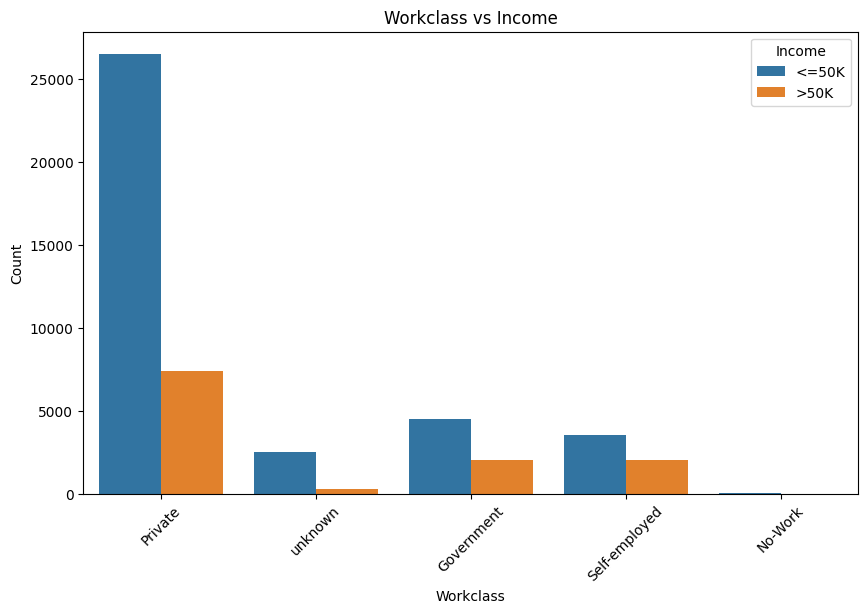

In [42]:
# Plot workclass vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', hue='income', data=merged_data_sorted)
plt.title('Workclass vs Income')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


### plot fnlwgt with income

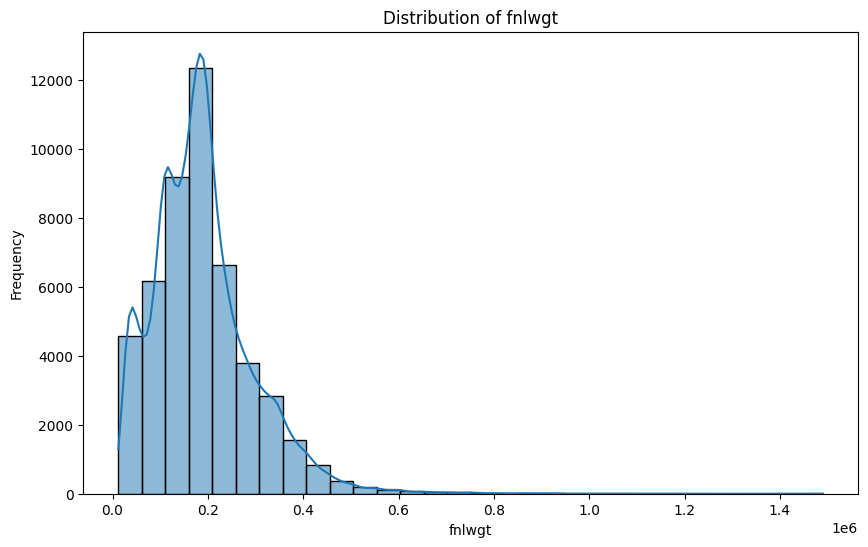

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram for 'fnlwgt' column
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data_sorted, x='fnlwgt', bins=30, kde=True)
plt.title('Distribution of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()


### ignore fnlwgt for now

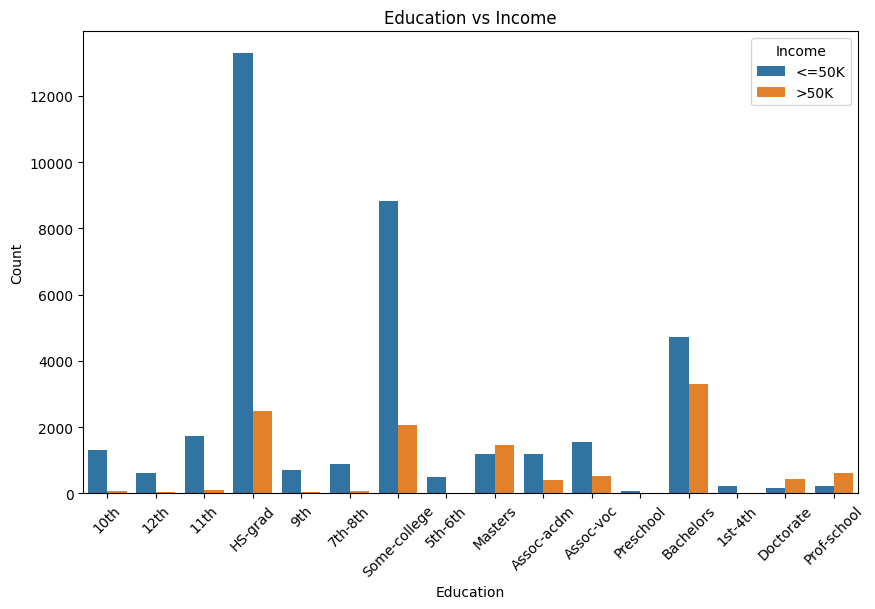

In [44]:
# Plot education vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='income', data=merged_data_sorted)
plt.title('Education vs Income')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


In [45]:
merged_data_sorted['education'].value_counts()


education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

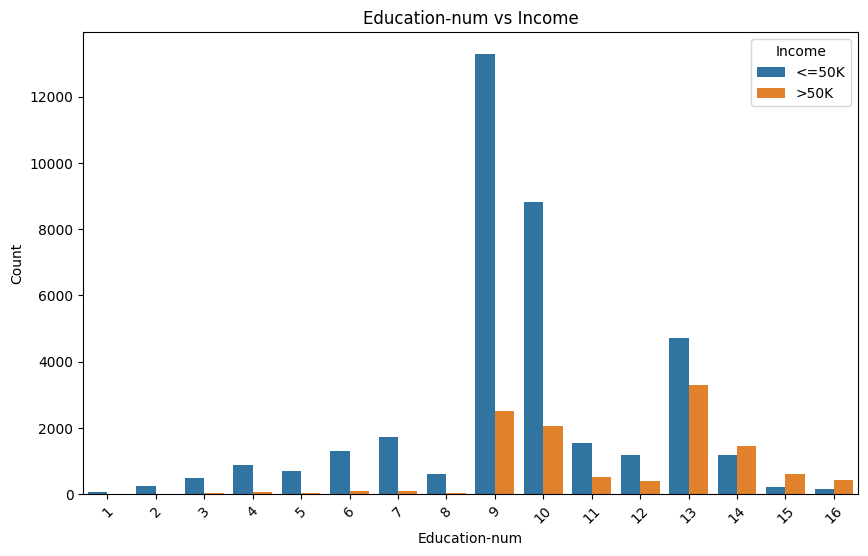

In [46]:
# Plot education vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='education-num', hue='income', data=merged_data_sorted)
plt.title('Education-num vs Income')
plt.xlabel('Education-num')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


In [47]:
merged_data_sorted['education-num'].value_counts()


education-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64

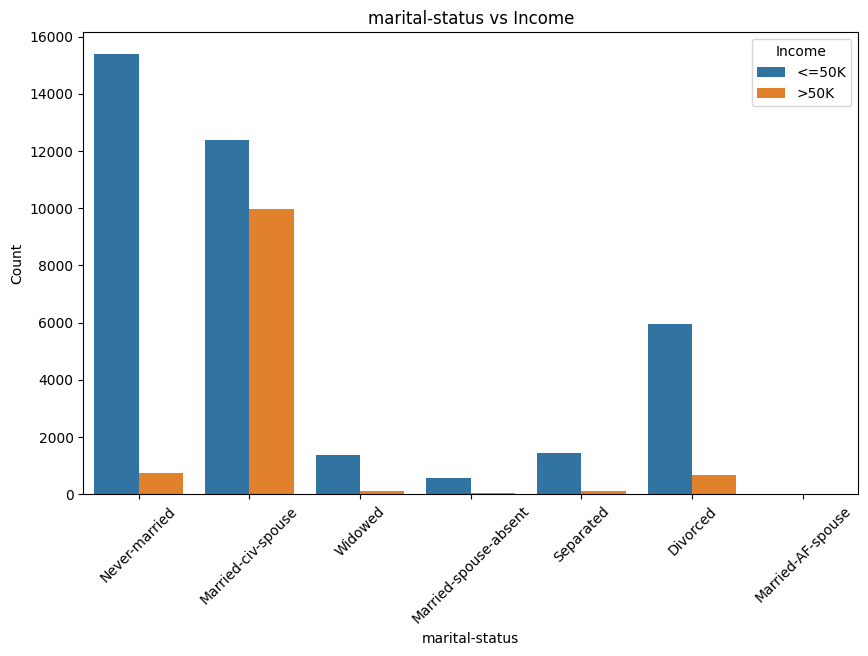

In [48]:
# Plot marital-status vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='marital-status', hue='income', data=merged_data_sorted)
plt.title('marital-status vs Income')
plt.xlabel('marital-status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


In [49]:
merged_data_sorted['marital-status'].value_counts()


marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

### Combine categories

In [50]:
# Combine categories in the 'marital-status' attribute
merged_data_sorted['marital-status'] = merged_data_sorted['marital-status'].replace({
    'Married-civ-spouse': 'Married',
    'Married-AF-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Divorced': 'Single',
    'Separated': 'Separated',
    'Widowed': 'Single',
    'Never-married': 'Single'
})

# Check the unique values after combining categories
print(merged_data_sorted['marital-status'].unique())


['Single' 'Married' 'Separated']


In [51]:
merged_data_sorted['marital-status'].value_counts()


marital-status
Single       24268
Married      23044
Separated     1530
Name: count, dtype: int64

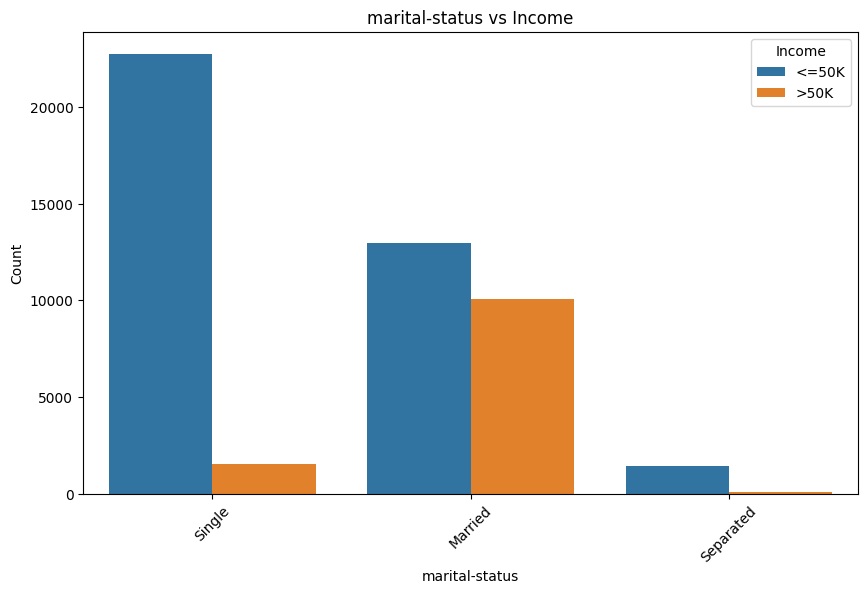

In [52]:
# Plot marital-status vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='marital-status', hue='income', data=merged_data_sorted)
plt.title('marital-status vs Income')
plt.xlabel('marital-status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


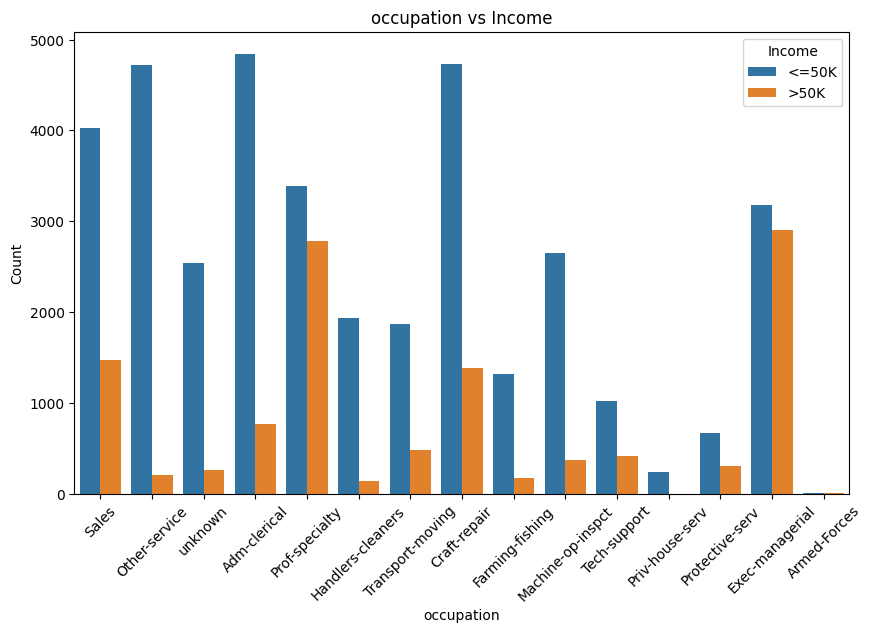

In [53]:
# Plot occupation vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation', hue='income', data=merged_data_sorted)
plt.title('occupation vs Income')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


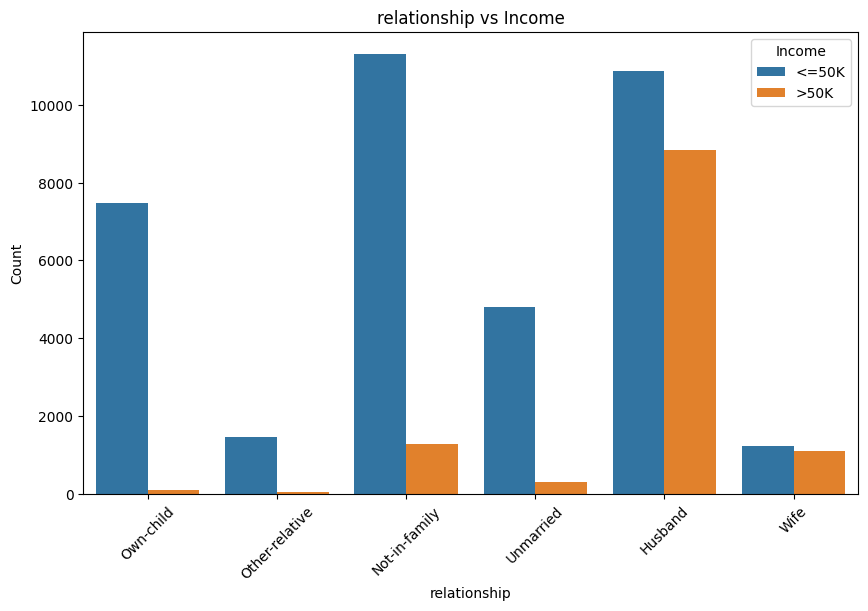

In [54]:
# Plot relationship vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='relationship', hue='income', data=merged_data_sorted)
plt.title('relationship vs Income')
plt.xlabel('relationship')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


In [56]:
merged_data_sorted['relationship'].value_counts()


relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

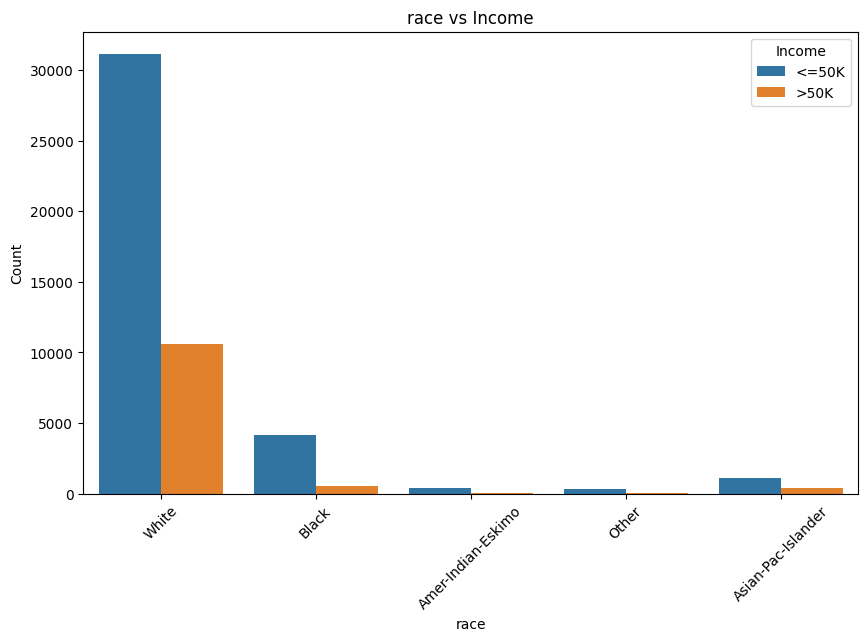

In [55]:
# Plot race vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='income', data=merged_data_sorted)
plt.title('race vs Income')
plt.xlabel('race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


In [57]:
merged_data_sorted['race'].value_counts()


race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

## combine above if needed

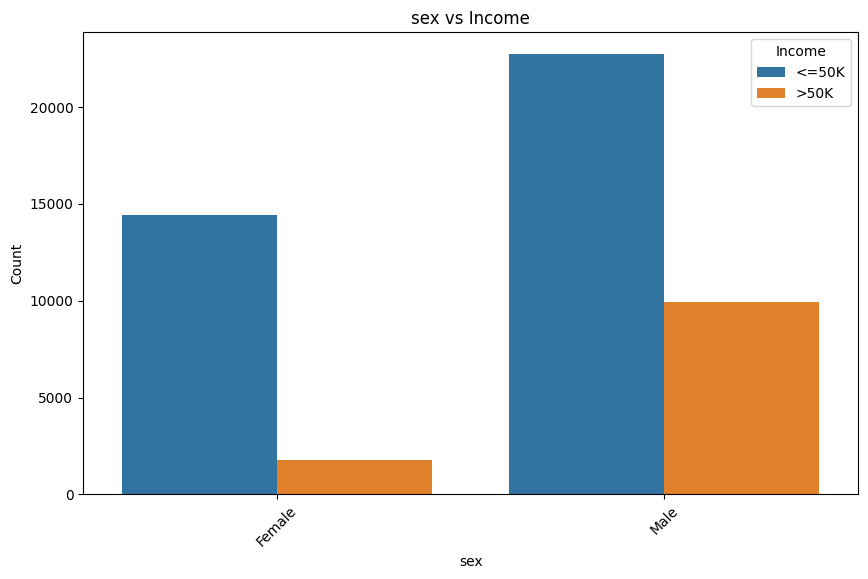

In [58]:
# Plot sex vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='income', data=merged_data_sorted)
plt.title('sex vs Income')
plt.xlabel('sex')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()


In [59]:
merged_data_sorted['sex'].value_counts()


sex
Male      32650
Female    16192
Name: count, dtype: int64

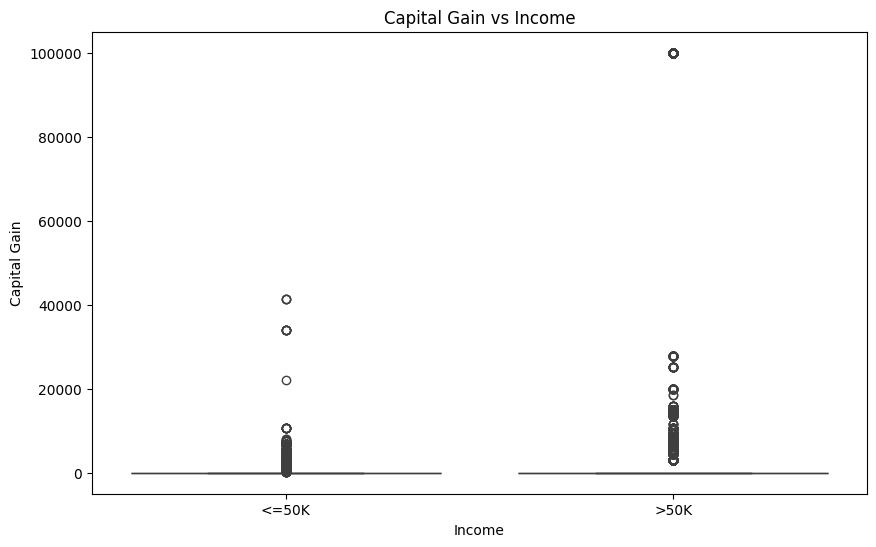

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital-gain', data=merged_data_sorted)
plt.title('Capital Gain vs Income')
plt.xlabel('Income')
plt.ylabel('Capital Gain')
plt.show()


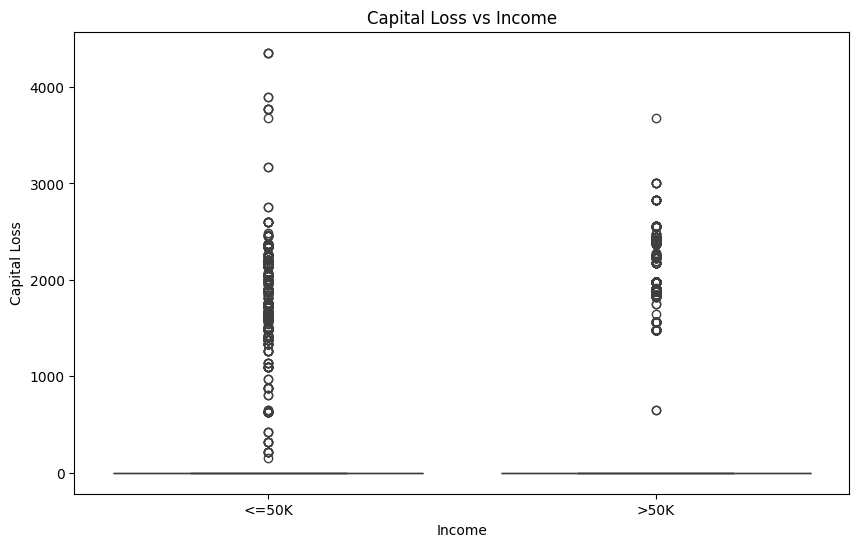

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital-loss', data=merged_data_sorted)
plt.title('Capital Loss vs Income')
plt.xlabel('Income')
plt.ylabel('Capital Loss')
plt.show()


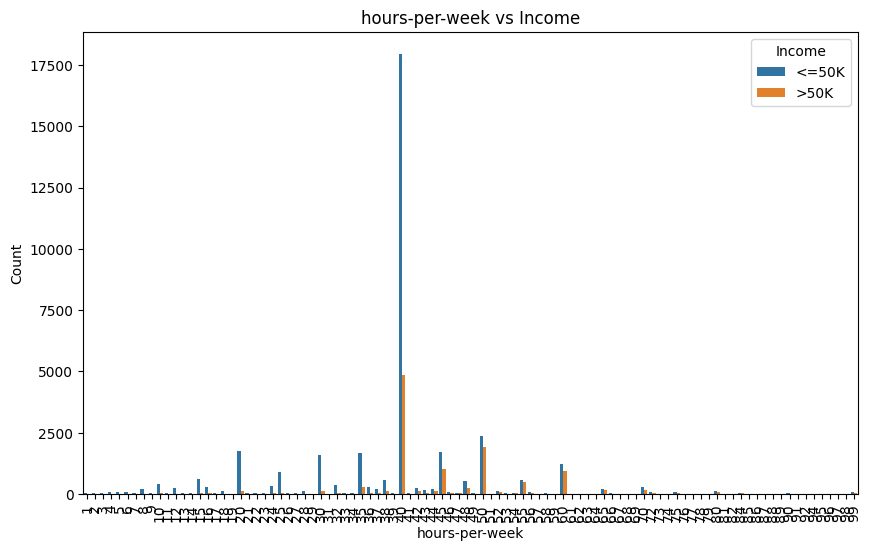

In [62]:
# Plot hours-per-week vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='hours-per-week', hue='income', data=merged_data_sorted)
plt.title('hours-per-week vs Income')
plt.xlabel('hours-per-week')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Income')
plt.show()


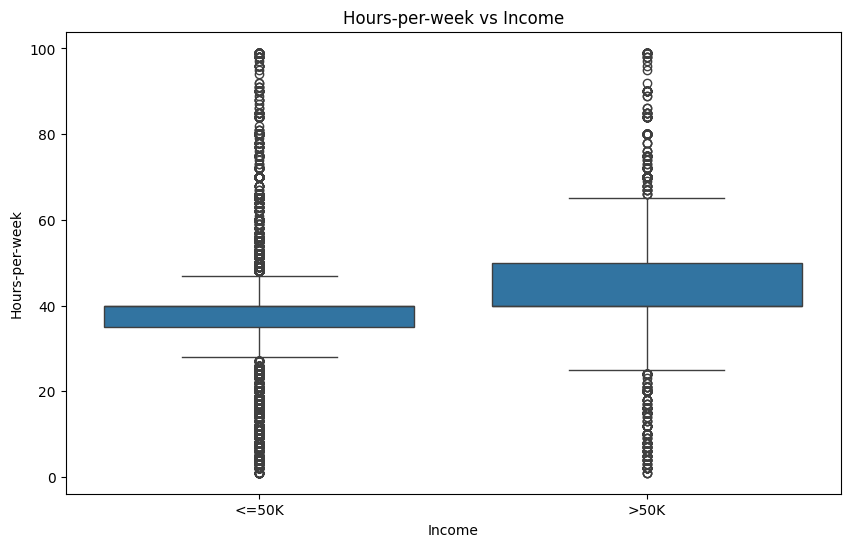

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='hours-per-week', data=merged_data)
plt.title('Hours-per-week vs Income')
plt.xlabel('Income')
plt.ylabel('Hours-per-week')
plt.show()


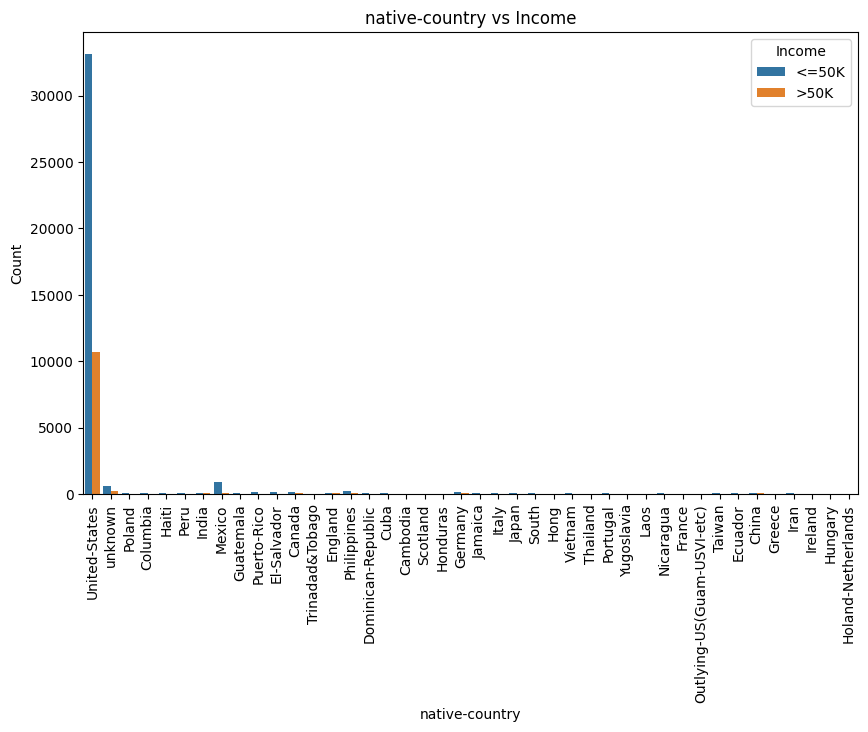

In [64]:
# Plot native-country vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='native-country', hue='income', data=merged_data_sorted)
plt.title('native-country vs Income')
plt.xlabel('native-country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Income')
plt.show()


In [65]:
merged_data_sorted['native-country'].value_counts()


native-country
United-States                 43832
Mexico                          951
unknown                         857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

### combine categories

In [66]:
# Combine categories in the 'native-country' attribute
merged_data_sorted['native-country'] = merged_data_sorted['native-country'].replace({
    'United-States': 'US',
    'Cambodia': 'Other',
    'England': 'Other',
    'Puerto-Rico': 'Other',
    'Canada': 'Other',
    'Germany': 'Other',
    'Outlying-US(Guam-USVI-etc)': 'Other',
    'India': 'Other',
    'Japan': 'Other',
    'Greece': 'Other',
    'South': 'Other',
    'China': 'Other',
    'Cuba': 'Other',
    'Iran': 'Other',
    'Honduras': 'Other',
    'Philippines': 'Other',
    'Italy': 'Other',
    'Poland': 'Other',
    'Jamaica': 'Other',
    'Vietnam': 'Other',
    'Mexico': 'Other',
    'Portugal': 'Other',
    'Ireland': 'Other',
    'France': 'Other',
    'Dominican-Republic': 'Other',
    'Laos': 'Other',
    'Ecuador': 'Other',
    'Taiwan': 'Other',
    'Haiti': 'Other',
    'Columbia': 'Other',
    'Hungary': 'Other',
    'Guatemala': 'Other',
    'Nicaragua': 'Other',
    'Scotland': 'Other',
    'Thailand': 'Other',
    'Yugoslavia': 'Other',
    'El-Salvador': 'Other',
    'Trinadad&Tobago': 'Other',
    'Peru': 'Other',
    'Hong': 'Other',
    'Holand-Netherlands': 'Other'
})

# Check the unique values after combining categories
print(merged_data_sorted['native-country'].unique())


['US' 'unknown' 'Other']


In [67]:
merged_data_sorted['native-country'].value_counts()


native-country
US         43832
Other       4153
unknown      857
Name: count, dtype: int64

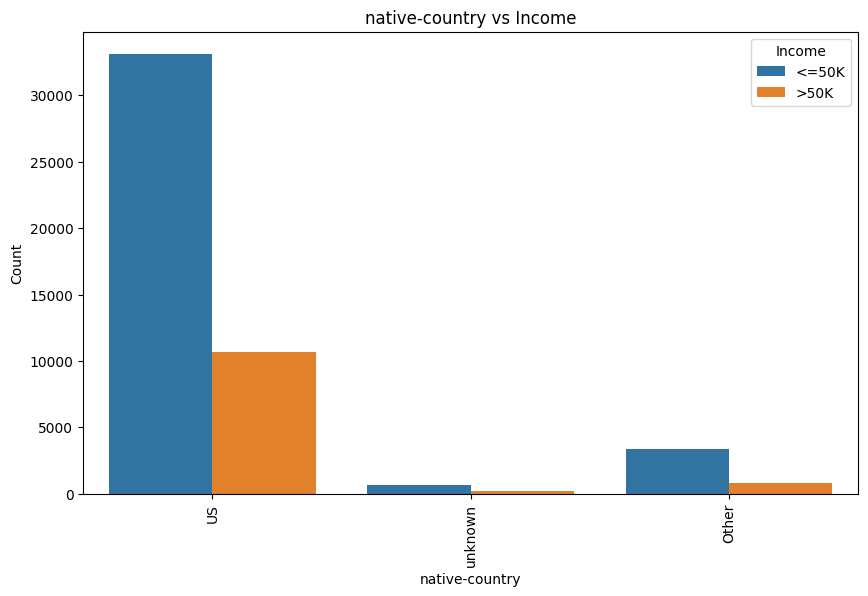

In [68]:
# Plot native-country vs income
plt.figure(figsize=(10, 6))
sns.countplot(x='native-country', hue='income', data=merged_data_sorted)
plt.title('native-country vs Income')
plt.xlabel('native-country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Income')
plt.show()


In [69]:
merged_data_sorted.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643463,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.709182,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,87.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [71]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Select only the numerical columns for scaling
numerical_cols = merged_data_sorted.select_dtypes(include=['int64', 'float64'])

# Fit and transform the selected numerical columns
scaled_data = scaler.fit_transform(numerical_cols)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(data=scaled_data, columns=numerical_cols.columns)

# Concatenate the scaled numerical data with the non-numerical columns from merged_data_sorted
merged_data_scaled = pd.concat([scaled_df, merged_data_sorted.select_dtypes(exclude=['int64', 'float64'])], axis=1)

# Display the scaled DataFrame
print(merged_data_scaled)


            age    fnlwgt  education-num  capital-gain  capital-loss  \
0     -1.578773 -1.446808      -1.586221     -0.144804     -0.217127   
1     -1.578773 -1.096978      -0.808297     -0.144804     -0.217127   
2     -1.578773 -0.229228      -1.586221     -0.144804     -0.217127   
3     -1.578773 -1.355721      -1.197259     -0.144804     -0.217127   
4     -1.578773 -1.414403      -1.197259     -0.144804     -0.217127   
...         ...       ...            ...           ...           ...   
48837  3.527346 -0.134657      -2.364144     -0.144804     -0.217127   
48838  3.527346 -0.018135       0.747550     -0.144804     -0.217127   
48839  3.527346 -1.342151      -0.419335     -0.144804     -0.217127   
48840  3.527346  0.075271      -0.419335     -0.144804     -0.217127   
48841  3.527346  1.177258      -1.197259     -0.144804     -0.217127   

       hours-per-week      workclass  education marital-status  \
0           -2.455137     Government  Bachelors         Single   
1  

In [72]:
# Display descriptive statistics of the scaled DataFrame
print(merged_data_scaled.describe())


                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  4.884200e+04  4.884200e+04   4.884200e+04  4.884200e+04  4.884200e+04   
mean  -3.724232e-17 -5.586348e-17  -8.845051e-17  1.163823e-17 -1.745734e-17   
std    1.000010e+00  1.000010e+00   1.000010e+00  1.000010e+00  1.000010e+00   
min   -1.578773e+00 -1.679680e+00  -3.531030e+00 -1.448035e-01 -2.171271e-01   
25%   -7.763827e-01 -6.828752e-01  -4.193353e-01 -1.448035e-01 -2.171271e-01   
50%   -1.198817e-01 -1.090844e-01  -3.037346e-02 -1.448035e-01 -2.171271e-01   
75%    6.825085e-01  4.543232e-01   7.475502e-01 -1.448035e-01 -2.171271e-01   
max    3.527346e+00  1.231723e+01   2.303397e+00  1.327438e+01  1.059179e+01   

       hours-per-week  
count    4.884200e+04  
mean     2.793174e-17  
std      1.000010e+00  
min     -3.181452e+00  
25%     -3.408696e-02  
50%     -3.408696e-02  
75%      3.694214e-01  
max      4.727312e+00  


In [81]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
merged_data_scaled['workclass'] = le.fit_transform(merged_data_scaled['workclass'])
merged_data_scaled['education'] = le.fit_transform(merged_data_scaled['education'])
merged_data_scaled['marital-status'] = le.fit_transform(merged_data_scaled['marital-status'])
merged_data_scaled['occupation'] = le.fit_transform(merged_data_scaled['occupation'])
merged_data_scaled['relationship'] = le.fit_transform(merged_data_scaled['relationship'])
merged_data_scaled['race'] = le.fit_transform(merged_data_scaled['race'])
merged_data_scaled['sex'] = le.fit_transform(merged_data_scaled['sex'])
merged_data_scaled['native-country'] = le.fit_transform(merged_data_scaled['native-country'])
merged_data_scaled['income'] = le.fit_transform(merged_data_scaled['income'])
merged_data_scaled.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,-1.578773,-1.446808,-1.586221,-0.144804,-0.217127,-2.455137,0,9,2,0,1,4,1,1,0
1,-1.578773,-1.096978,-0.808297,-0.144804,-0.217127,-2.616540,3,9,0,3,0,4,1,1,0
2,-1.578773,-0.229228,-1.586221,-0.144804,-0.217127,-1.970927,2,11,2,5,1,4,1,1,0
3,-1.578773,-1.355721,-1.197259,-0.144804,-0.217127,-2.858645,2,1,0,5,0,2,1,1,0
4,-1.578773,-1.414403,-1.197259,-0.144804,-0.217127,-1.244612,2,9,0,9,5,2,0,0,0


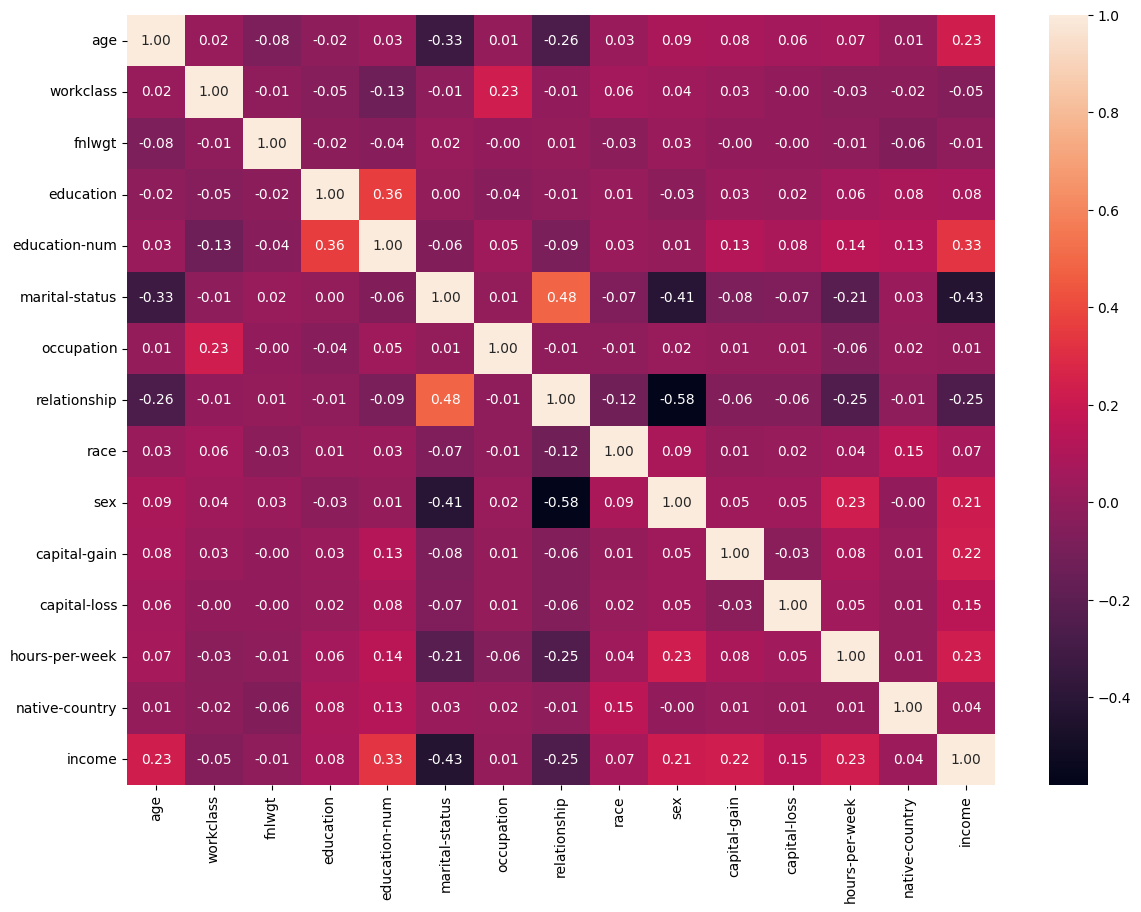

In [82]:
plt.figure(figsize=(14,10))
sns.heatmap(merged_data_sorted.corr(),annot=True,fmt='.2f')
plt.show()

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

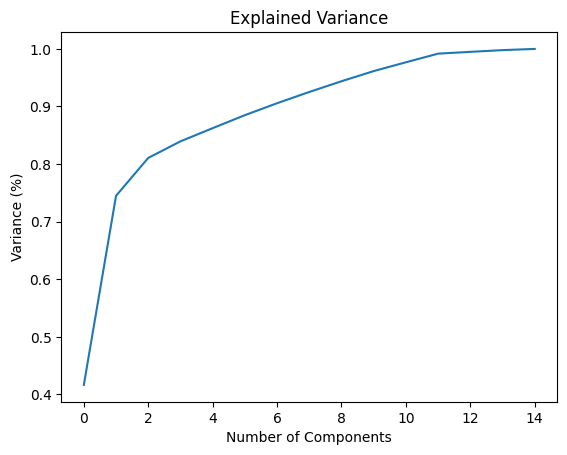

In [84]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(merged_data_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()
#explain variance scree plot - guide how much components to have by plotting